<h1 align="center">SLRegProject</h1>

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

## Data Preparation:

In [107]:
covid_df = pd.read_csv(r"C:\Users\danir\Desktop\קורס AI\פתרונות שב ומטלות\SL\exam\Covid19_With_GDP_Values.csv")

In [108]:
covid_df_copy = covid_df.copy()
covid_df_copy

,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,0,Afghanistan,2021-01-01,0,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,1,Afghanistan,2022-01-01,0,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,2,Albania,2021-01-01,0,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,3,Albania,2022-01-01,0,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,4,Algeria,2021-01-01,0,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...,...,...
335,335,West Bank and Gaza,2022-01-01,0,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,336,Zambia,2021-01-01,0,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,337,Zambia,2022-01-01,0,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,338,Zimbabwe,2021-01-01,0,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


***part 1 - Remove unknown columns:***

In [109]:
covid_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      340 non-null    int64  
 1   Country/Region  340 non-null    object 
 2   Date            340 non-null    object 
 3   Province/State  340 non-null    object 
 4   Confirmed       340 non-null    float64
 5   Deaths          340 non-null    float64
 6   Recovered       340 non-null    float64
 7   GDP             340 non-null    float64
 8   Unemployment    340 non-null    float64
 9   CPI             338 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 26.7+ KB


In [110]:
covid_df_copy["Province/State"].astype(str).str.strip(); print((covid_df_copy.isin(["0","0.0"])).sum())

Unnamed: 0          0
Country/Region      0
Date                0
Province/State    324
Confirmed           0
Deaths              0
Recovered           0
GDP                 0
Unemployment        0
CPI                 0
dtype: int64


In [111]:
# remove 'Unnamed: 0'  because it just technical index from CSV. 
#remove 'Province/State' because Its value is 0 for almost all records and therefore does not contribute to prediction.
covid_df_copy = covid_df_copy.drop(["Unnamed: 0","Province/State"], axis=1)
covid_df_copy

,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,Afghanistan,2021-01-01,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,Afghanistan,2022-01-01,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,Albania,2021-01-01,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,Albania,2022-01-01,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,Algeria,2021-01-01,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...
335,West Bank and Gaza,2022-01-01,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,Zambia,2021-01-01,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,Zambia,2022-01-01,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,Zimbabwe,2021-01-01,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


***part 2 - handle missing values:***

In [112]:
missing_data = covid_df_copy.isnull().sum()
total_rows = covid_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows 
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total rows', 'Missing rows', 'percentage missing'])
final_missing_data

,Total rows,Missing rows,percentage missing
Country/Region,340,0,0.000000
Date,340,0,0.000000
Confirmed,340,0,0.000000
Deaths,340,0,0.000000
Recovered,340,0,0.000000
GDP,340,0,0.000000
Unemployment,340,0,0.000000
CPI,340,2,0.588235


In [113]:
#drop NAN because there only 2 NAN values in 340 samples(0.5%) and therefore it is not a significant lose of data
covid_df_copy = covid_df_copy.dropna()
covid_df_copy.shape

(338, 8)

In [114]:
# checking for meaningless values
for col in covid_df_copy.columns:
    print(f"{col}:")
    print(covid_df_copy[col].unique()[:20]) 
    print("-"*40)

Country/Region:
['Albania' 'Algeria' 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']
----------------------------------------
Date:
['2021-01-01' '2022-01-01']
----------------------------------------
Confirmed:
[5.831600e+04 2.102240e+05 9.989700e+04 2.188180e+05 8.117000e+03
 2.374000e+04 1.756800e+04 8.239800e+04 1.590000e+02 4.283000e+03
 1.629594e+06 5.674428e+06 1.597380e+05 3.449800e+05 2.846000e+04
 4.629550e+05 3.587740e+05 1.274628e+06 2.190410e+05 6.173110e+05]
----------------------------------------
Deaths:
[1.18100e+03 3.21700e+03 2.76200e+03 6.28400e+03 8.40000e+01 1.40000e+02
 4.05000e+02 1.77200e+03 5.00000e+00 1.19000e+02 4.33190e+04 1.17181e+05
 2.82800e+03 7.97500e+03 9.09000e+02 2.25700e+03 7.56400e+03 1.68450e+04
 2.67000e+03 8.36500e+03]
----------------------------------------
Recovered:
[3.36340

In [115]:
# check for suspected zeros
(covid_df_copy == 0).sum()

Country/Region      0
Date                0
Confirmed           7
Deaths             23
Recovered         177
GDP                 0
Unemployment        0
CPI                 0
dtype: int64

In [116]:
#check the number of zero values in every Date on "Recovered" (the zeros in entire columns are logical)
zeros_by_date = (
    covid_df_copy
    .groupby("Date")["Recovered"]
    .apply(lambda x: (x == 0).sum())
    .reset_index(name="num_zeros")
)

print(zeros_by_date)
print("\nalmost all 'Recovered' data rows of 2022 are 0 so it indicates about lack of reporting in year 2022")

         Date  num_zeros
0  2021-01-01          8
1  2022-01-01        169

almost all 'Recovered' data rows of 2022 are 0 so it indicates about lack of reporting in year 2022


**Explanation:** Since there are many zero values in the 2022 data, I assume these zeros result from missing reports rather than actual values. In contrast, the 2021 data is much more complete, so we can use it to estimate realistic values. Leaving the zeros as they are would bias the dataset. Therefore,in the following code I calculated for each country the ratio between recovered and confirmed cases in 2021, and used this ratio to fill the missing or zero recovery values in 2022. This approach helps reduce data bias and improves the reliability of the dataset.

In [117]:
# calculate ratio of "Recovered"/"Confirmed" of 2021 to aplly it on the missing values on year 2022

covid_df_copy = covid_df_copy.copy()
covid_df_copy["Date"] = pd.to_datetime(covid_df_copy["Date"], errors="coerce")

totals = covid_df_copy.loc[covid_df_copy["Date"].dt.year == 2021].groupby("Country/Region", as_index=False)[["Recovered", "Confirmed"]].sum()

totals["ratio"] = totals["Recovered"] / totals["Confirmed"]
totals.loc[totals["Confirmed"] == 0, "ratio"] = np.nan

ratio_by_country = totals.set_index("Country/Region")["ratio"].sort_values(ascending=False)
print(ratio_by_country.head(10))

Country/Region
Samoa               1.000000
Vanuatu             1.000000
Marshall Islands    1.000000
Singapore           0.996930
El Salvador         0.988068
Qatar               0.982741
Djibouti            0.982021
Gabon               0.980880
Ghana               0.978664
Guinea-Bissau       0.977569
Name: ratio, dtype: float64


In [118]:
# fill the missing values of 2022 'Recovered' column

mask_2022 = covid_df_copy["Date"].dt.year == 2022
mask_missing_recovered = (mask_2022) & (covid_df_copy["Recovered"] == 0)

ratio_map = covid_df_copy["Country/Region"].map(ratio_by_country)
fill_candidate = covid_df_copy["Confirmed"] * ratio_map

condition = mask_missing_recovered & fill_candidate.notna()
covid_df_copy.loc[condition, "Recovered"] = fill_candidate.loc[condition]

print("Zeros remaining:", (covid_df_copy["Recovered"] == 0).sum())
print("NaN remaining:", covid_df_copy["Recovered"].isna().sum())

Zeros remaining: 16
NaN remaining: 0


In [119]:
remaining_zeros = covid_df_copy[covid_df_copy["Recovered"] == 0]
print(remaining_zeros.shape)   
print(remaining_zeros)

(16, 8)
    Country/Region       Date  Confirmed   Deaths  Recovered           GDP  \
30         Belgium 2021-01-01   648289.0  19581.0        0.0  6.009045e+11   
31         Belgium 2022-01-01  2105343.0  28331.0        0.0  5.836140e+11   
162       Kiribati 2021-01-01        0.0      0.0        0.0  2.892075e+08   
163       Kiribati 2022-01-01        2.0      0.0        0.0  2.705207e+08   
218          Nauru 2021-01-01        0.0      0.0        0.0  1.753903e+08   
219          Nauru 2022-01-01        0.0      0.0        0.0  1.538246e+08   
240          Palau 2021-01-01        0.0      0.0        0.0  2.298582e+08   
241          Palau 2022-01-01       12.0      0.0        0.0  2.423337e+08   
272         Serbia 2021-01-01   339997.0   3250.0        0.0  6.310104e+10   
273         Serbia 2022-01-01  1300949.0  12739.0        0.0  6.356341e+10   
298         Sweden 2021-01-01   437379.0   8727.0        0.0  6.397150e+11   
299         Sweden 2022-01-01  1314784.0  15310.0       

**Explanation:** After applying the ratio-based method, three countries still lacked recovery data from 2021, so I couldn’t use the same approach for them. To handle these remaining missing values, I filled them using the overall median recovery value across all countries. This alternative method further reduces bias while preserving the usability of the recovery column.

In [120]:
# Fill missing 2022 'Recovered' where zeros are not logical using 2021 country medians (fallback: global median)

target_countries = ["Belgium","Serbia","Sweden"]
mask = covid_df_copy["Country/Region"].isin(target_countries)

median_2021_by_country = (
    covid_df_copy.loc[covid_df_copy["Date"].dt.year == 2021, ["Country/Region","Recovered"]]
    .replace({"Recovered": {0: np.nan}})
    .groupby("Country/Region")["Recovered"].median()
)

fallback_median = median_2021_by_country.median()

covid_df_copy.loc[mask, "Recovered"] = fallback_median

In [121]:
remaining_zeros = covid_df_copy[covid_df_copy["Recovered"] == 0]
print(remaining_zeros.shape)   
print(remaining_zeros)
print("\nremaining zeros on 'Recovered' 'Confirmed' and 'Deaths' columns  are logical and can be real")

(10, 8)
    Country/Region       Date  Confirmed  Deaths  Recovered           GDP  \
162       Kiribati 2021-01-01        0.0     0.0        0.0  2.892075e+08   
163       Kiribati 2022-01-01        2.0     0.0        0.0  2.705207e+08   
218          Nauru 2021-01-01        0.0     0.0        0.0  1.753903e+08   
219          Nauru 2022-01-01        0.0     0.0        0.0  1.538246e+08   
240          Palau 2021-01-01        0.0     0.0        0.0  2.298582e+08   
241          Palau 2022-01-01       12.0     0.0        0.0  2.423337e+08   
312          Tonga 2021-01-01        0.0     0.0        0.0  4.692282e+08   
313          Tonga 2022-01-01        1.0     0.0        0.0  5.002749e+08   
318         Tuvalu 2021-01-01        0.0     0.0        0.0  6.019641e+07   
319         Tuvalu 2022-01-01        0.0     0.0        0.0  5.906598e+07   

     Unemployment         CPI  
162         5.805  105.218807  
163         5.805  105.218807  
218        19.748  177.472174  
219        19.74

In [122]:
# cheking again to be sure there are no missing values 
missing_data = covid_df_copy.isnull().sum()
total_rows = covid_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows 
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total rows', 'Missing rows', 'percentage missing'])
display(final_missing_data)
print("all missing values handled")

,Total rows,Missing rows,percentage missing
Country/Region,338,0,0.0
Date,338,0,0.0
Confirmed,338,0,0.0
Deaths,338,0,0.0
Recovered,338,0,0.0
GDP,338,0,0.0
Unemployment,338,0,0.0
CPI,338,0,0.0


all missing values handled


***part 3 - handle duplicated rows:***

In [123]:
duplicate_rows = covid_df_copy[covid_df_copy.duplicated()]
display(duplicate_rows)
print("no duplicated rows to remove")

,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI


no duplicated rows to remove


***part 4 - Convert categorical features to numerical form using the get_dummies() method if 
needed:***

In [124]:
print(" get_dummies() is not relevant here")

 get_dummies() is not relevant here


***part 5 -  aggregate the data:***

In [125]:
# aggregate the data by country for the years 2020 and 2021(so every country have now only one row)
# Use SUM for epidemiological counts (Confirmed, Deaths, Recovered)  because they represent cumulative totals across years.
# Use MEAN for economic indicators (GDP, Unemployment, CPI) because they represent yearly averages or rates.
sum_cols = ["Confirmed", "Deaths", "Recovered"]
mean_cols = ["GDP", "Unemployment", "CPI"]

df_sum = covid_df_copy.groupby("Country/Region", as_index=False)[sum_cols].sum()
df_mean = covid_df_copy.groupby("Country/Region", as_index=False)[mean_cols].mean()

df_yearly = pd.merge(df_sum, df_mean, on="Country/Region")

df_yearly.head()


,Country/Region,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,Albania,268540.0,4398.0,154881.582413,1.842347e+10,12.0305,127.599748
1,Algeria,318715.0,9046.0,215019.444278,2.059128e+11,13.0220,173.919413
2,Andorra,31857.0,224.0,29290.229272,3.352643e+09,12.4370,181.619932
3,Angola,99966.0,2177.0,63423.328552,8.545244e+10,15.2460,645.998608
4,Antigua and Barbuda,4442.0,124.0,4134.691824,1.734550e+09,14.6930,123.019852


## Data exploration: 

***part 1 - Check the correlation between each feature to the label column and each feature to 
the other feature.***

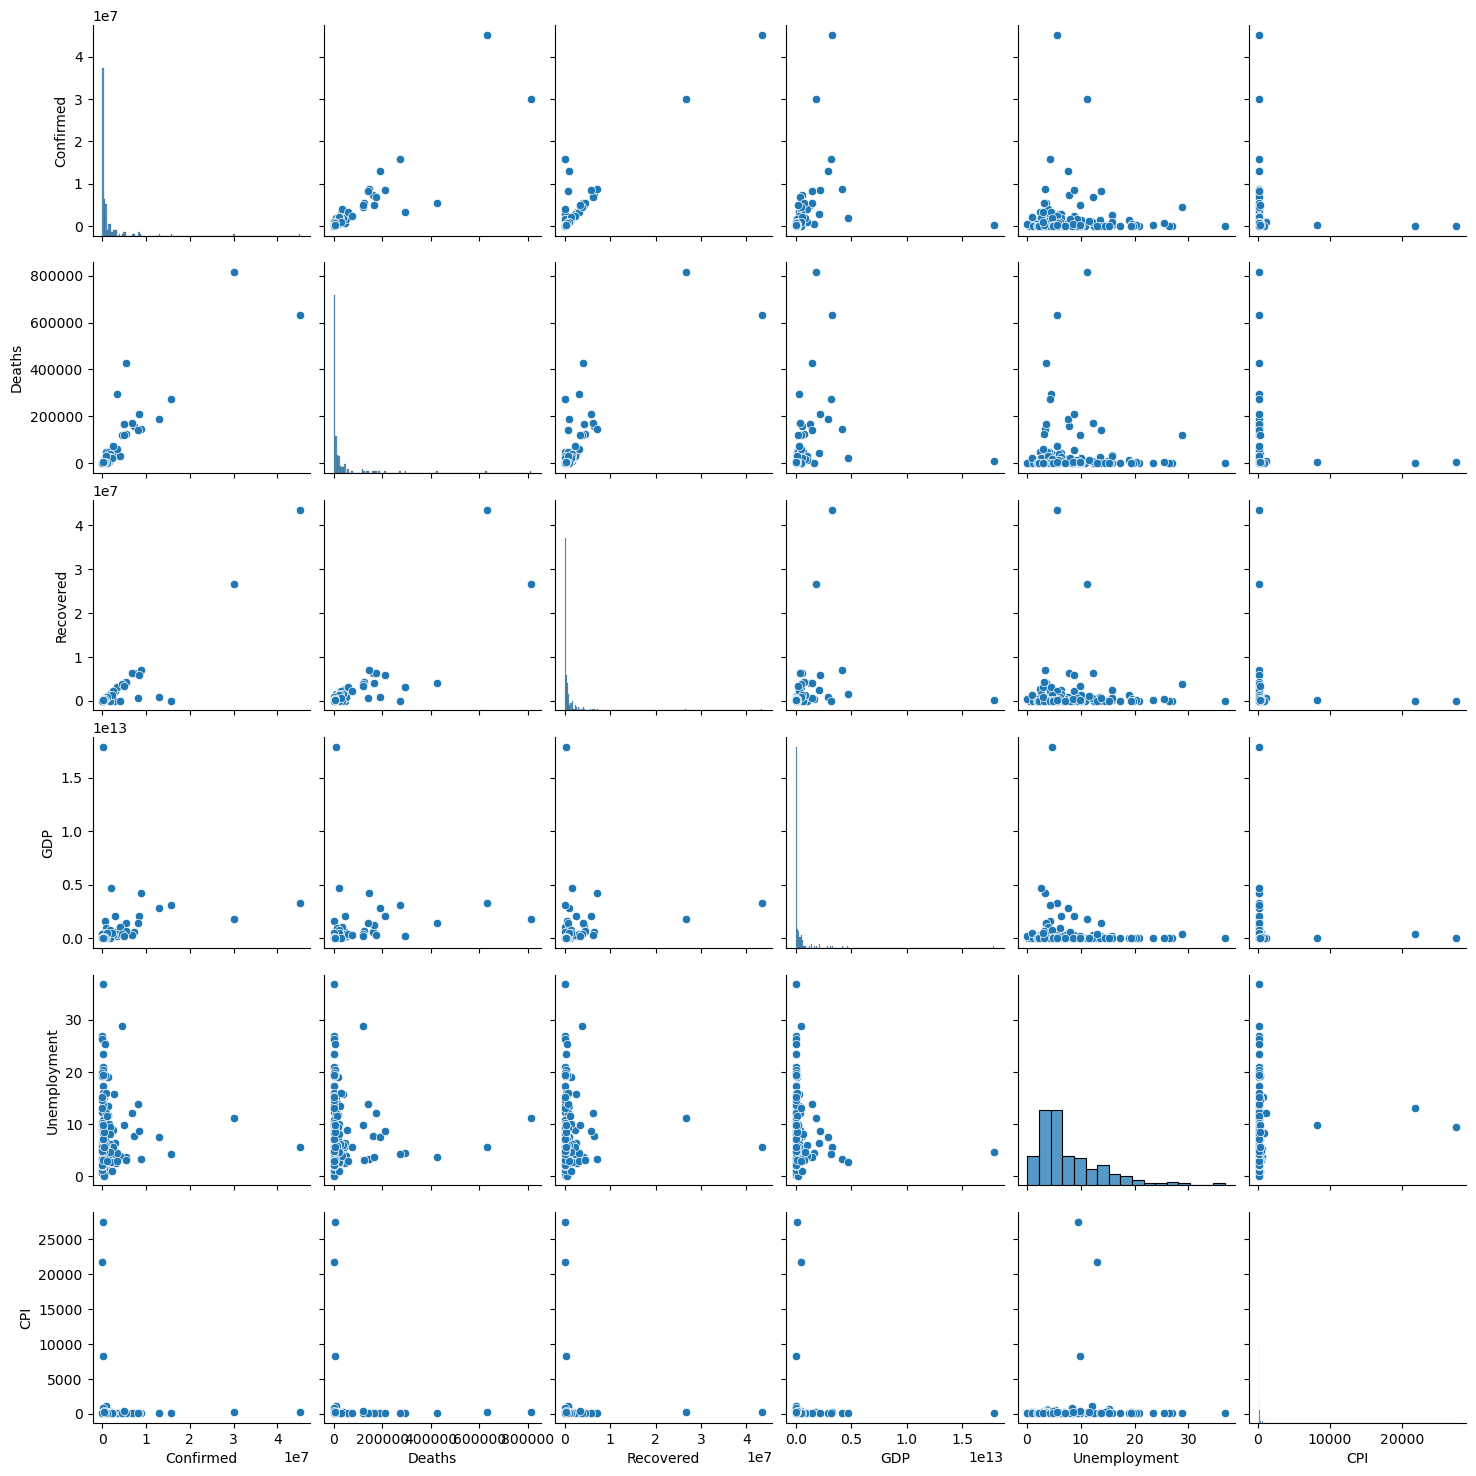

In [126]:
# correlation by pairplot
sns.pairplot(df_yearly)

In [127]:
# calculation of correlation to GDP
corr = df_yearly.select_dtypes("number").corr()
corr_to_gdp = corr["GDP"].drop("GDP").sort_values(ascending=False)
print("Correlation of each feature to GDP:")
print(corr_to_gdp)

Correlation of each feature to GDP:
Confirmed       0.274813
Deaths          0.243658
Recovered       0.209846
CPI            -0.021508
Unemployment   -0.094615
Name: GDP, dtype: float64


***part 2 - Generate a heatmap that visualizes those correlations:***

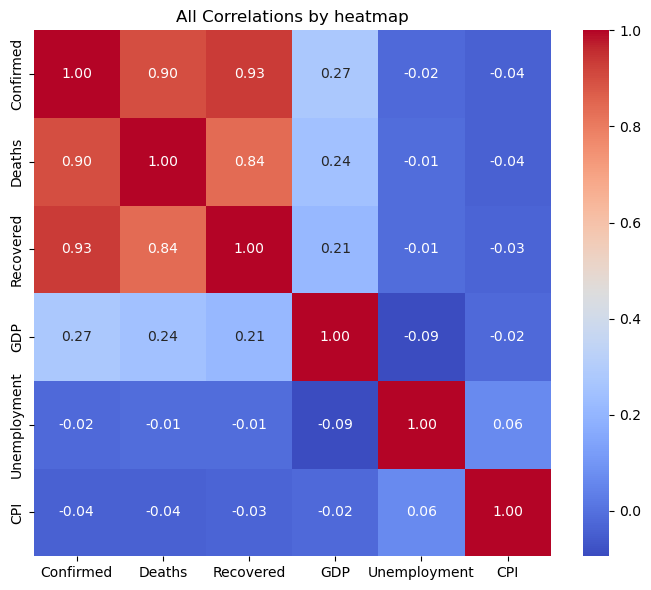

In [128]:
# Correlation by heatmap

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("All Correlations by heatmap")
plt.tight_layout()
plt.show()

***part 3 - Provide meaningful insight from the correlation check:***

### COVID-related variables
- **Confirmed ↔ Deaths (0.90)** – Very strong positive correlation.  
  → More confirmed cases naturally lead to more deaths.  
- **Confirmed ↔ Recovered (0.93)** – Very strong positive correlation.  
  → Larger outbreaks lead to more recoveries.  
- **Deaths ↔ Recovered (0.84)** – Strong positive correlation.  
  → Both depend on total infection counts.  

***These three variables are highly correlated, indicating multicollinearity — they contain overlapping information.***

---

### Relationship between COVID metrics and GDP
- **Confirmed (0.27)** – Weak–moderate positive correlation.  
  → High-GDP countries tend to report more cases due to population size and testing capacity.  
- **Deaths (0.24)** – Weak positive correlation.  
  → Reflects similar reporting patterns.  
- **Recovered (0.21)** – Weak positive correlation.  
  → Consistent with total case count and healthcare quality.  

***COVID variables show only mild correlation with GDP — they are not strong predictors of economic performance.***

---

- **In the pairplot**, a clear linear trend can be observed between the COVID-related variables and GDP, as well as among the COVID-related variables themselves.

--- 

### Insights:
- It seems that there is a linear trend correlation with GDP.
- Strongest correlations exist **within COVID features**, not between COVID and economic indicators.  
- **GDP** correlates positivly to COVID-related variables but correlates only weakly with all other features.
- Before training, the data was aggregated by country to combine both 2020 and 2021 records. 
This aggregation step follows the project instructions and ensures that each country is represented by a single averaged record. 
As a result, some year-to-year variability was smoothed out, which explains why the COVID-related variables  correlations to GDP appear relatively weak.


## Linear Regression model training: 

In [129]:
# prepare import of all models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

***part 1-2 - Perform feature scaling of type Standardization and Perform train / test split:***

In [130]:
df_yearly["GDP"] = df_yearly["GDP"] / 1e9  # Scale down the GDP to smaller units

X = df_yearly[["Confirmed", "Deaths", "Recovered", "Unemployment", "CPI"]]
y = df_yearly["GDP"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

***part 3 - use any technique For finding optimal parameter values***

application of this task during **Multi model training** part

### Multi model training:

In [131]:
# prepare function of errors report
def reg_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# prepare function to print betas
def print_betas(model):
    feature_names = ["Confirmed", "Deaths", "Recovered", "Unemployment", "CPI"]
    print("model betas:")
    for name, coef in zip(feature_names, model.coef_):
        print(f"{name}: {coef:.6f}")

***part 1 -  Vanilla Linear Regression:***

In [132]:
from sklearn.model_selection import cross_val_score, KFold

lin_reg = LinearRegression()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_score = cross_val_score(lin_reg, scaled_X_train, y_train, cv=kfold, scoring="neg_root_mean_squared_error")

rmse_per_fold = -cv_score
avg_rmse = rmse_per_fold.mean()

lin_best_rmse = rmse_per_fold.min()     
lin_best_fold = rmse_per_fold.argmin()
print("RMSE per fold:", rmse_per_fold)
print("Average CV RMSE:", avg_rmse)

RMSE per fold: [1302.06283799  360.97933878 3738.59775155  340.76917532  345.77665521]
Average CV RMSE: 1217.6371517698155


In [133]:
lin_reg.fit(scaled_X_train, y_train)
y_pred_lin = lin_reg.predict(scaled_X_test)

lin_mae, lin_mse, lin_rmse = reg_report(y_test, y_pred_lin)

***part 2 - RidgeCV Regression:***

In [134]:
ridge = RidgeCV(alphas=np.logspace(-4, 4, 50), scoring="neg_mean_squared_error")
ridge.fit(scaled_X_train, y_train)
y_pred_ridge = ridge.predict(scaled_X_test)
ridge_mae, ridge_mse, ridge_rmse = reg_report(y_test, y_pred_ridge)

ridge_best_alpha = ridge.alpha_
ridge_best_score = ridge.best_score_

***part 3 - LassoCV Regression:***

In [135]:
lasso = LassoCV(eps=0.1, max_iter=10000, random_state=42)
lasso.fit(scaled_X_train, y_train)
y_pred_lasso = lasso.predict(scaled_X_test)

lasso_mae, lasso_mse, lasso_rmse = reg_report(y_test, y_pred_lasso)
lasso_best_alpha = lasso.alpha_

***part 4 - Polynomial Regression:***

In [136]:
train_rmse_errors = []
test_rmse_errors = []

for degree in range(1,9):
    polynomial_converter = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = polynomial_converter.fit_transform(scaled_X_train)
    X_test_poly  = polynomial_converter.transform(scaled_X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_predictions = model.predict(X_train_poly)
    test_predictions = model.predict(X_test_poly)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [137]:
train_rmse_errors

[np.float64(1669.4580728699366),
 np.float64(1635.4129219467184),
 np.float64(1420.615544814898),
 np.float64(0.012862124650255831),
 np.float64(0.0070525503666373154),
 np.float64(0.006714332495867747),
 np.float64(0.24289355897799436),
 np.float64(96.96101302533495)]

In [138]:
test_rmse_errors

[np.float64(649.8776178144733),
 np.float64(22105.87856740173),
 np.float64(8078426.666469959),
 np.float64(19634224463.21728),
 np.float64(1057258293747.4045),
 np.float64(3772063740664.6313),
 np.float64(14433745275639.055),
 np.float64(312367787910547.75)]

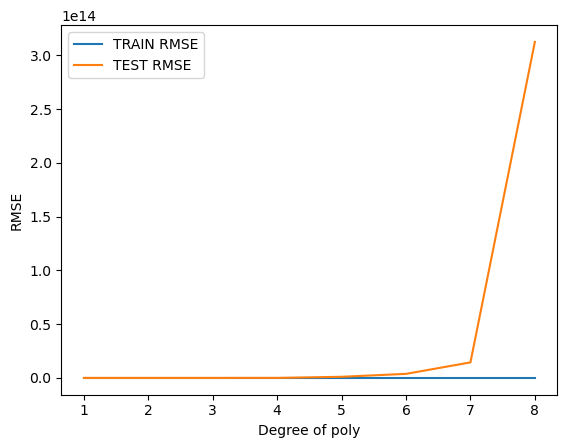

In [139]:
plt.plot(range(1,9), train_rmse_errors, label= 'TRAIN RMSE')
plt.plot(range(1,9), test_rmse_errors, label= 'TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()
plt.show()

**conclusion:** Based on the RMSE results, we observe that increasing the polynomial degree beyond 1 leads to a higher test RMSE. This indicates that model performance worsens with higher degrees (signs of overfitting). Therefore, we can conclude that the optimal polynomial degree is 1.

In [140]:
# performe the tPolynomial Regression with optimal polynomial degree
best_poly = PolynomialFeatures(degree=1, include_bias=False)

X_train_p = best_poly.fit_transform(scaled_X_train)
X_test_p  = best_poly.transform(scaled_X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train)
y_pred_poly = poly_model.predict(X_test_p)

poly_mae, poly_mse, poly_rmse = reg_report(y_test, y_pred_poly)

## Multi model evaluation and deployment:

***part 1 - Print the optimal parameters values of each model:***

In [141]:
# linear regression best parameters:

print(f"Best RMSE: {lin_best_rmse:.4f}  (fold {lin_best_fold})")

Best RMSE: 340.7692  (fold 3)


In [142]:
# RidgeCV Regression best parameters:

print("RidgeCV best alpha:", ridge_best_alpha)
print("RidgeCV best score:", ridge_best_score)

RidgeCV best alpha: 159.98587196060572
RidgeCV best score: -2923300.534162111


In [143]:
# LassoCV Regression best parameters:

print("LassoCV best alpha:",lasso_best_alpha)

LassoCV best alpha: 71.67291317028841


In [144]:
# Polynomial Regression Regression best parameters:

print("Polynomial Regression best degree = 1")

Polynomial Regression best degree = 1


***part 2 - Print the beta coefficient the model found for each feature:***

In [145]:
# linear regression betas:

print_betas(lin_reg)

model betas:
Confirmed: 729.687993
Deaths: -40.491444
Recovered: -372.858410
Unemployment: -149.613059
CPI: -28.997966


In [146]:
# RidgeCV Regression betas:
ridge_betas = print_betas(ridge)

model betas:
Confirmed: 106.537552
Deaths: 64.176381
Recovered: 43.280248
Unemployment: -61.875227
CPI: -17.585978


In [147]:
# LassoCV Regression betas:
lasso_betas = print_betas(lasso)

model betas:
Confirmed: 278.828102
Deaths: 0.000000
Recovered: 0.000000
Unemployment: -77.186088
CPI: -0.000000


In [148]:
# Polynomial Regression Regression betas:

print_betas(poly_model)

model betas:
Confirmed: 729.687993
Deaths: -40.491444
Recovered: -372.858410
Unemployment: -149.613059
CPI: -28.997966


***part 3 - Evaluate each optimal model using MAE, MSE and RMSE:***

In [149]:
error_results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "poly"],
    "MAE":   [lin_mae, ridge_mae, lasso_mae, poly_mae],
    "MSE":   [lin_mse, ridge_mse, lasso_mse, poly_mse],
    "RMSE":  [lin_rmse, ridge_rmse, lasso_rmse, poly_rmse],
})

print(error_results)

    Model         MAE            MSE        RMSE
0  Linear  362.179064  422340.918136  649.877618
1   Ridge  423.220146  522573.116323  722.892189
2   Lasso  395.674986  472225.304215  687.186513
3    poly  362.179064  422340.918136  649.877618


***part 4 - Generate a single plot that shows all models accuracy values:***

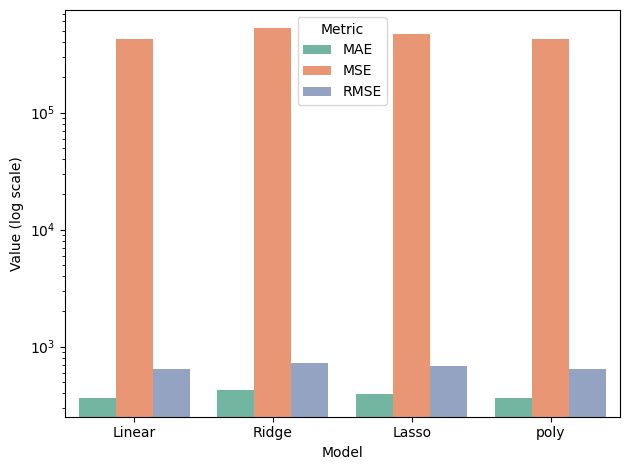

In [150]:
bar_plot = sns.barplot(
    data=error_results.melt(id_vars="Model", var_name="Metric", value_name="Value"),
    x="Model", y="Value", hue="Metric", palette="Set2"
)
bar_plot.set_yscale("log")
bar_plot.set_ylabel("Value (log scale)")
plt.tight_layout(); plt.show()


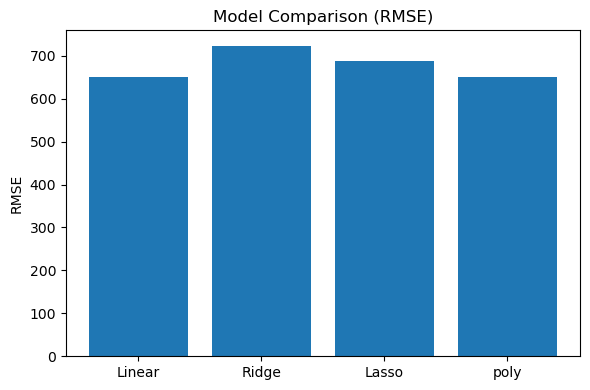

In [151]:
plt.figure(figsize=(6,4))
plt.bar(error_results["Model"], error_results["RMSE"])
plt.ylabel("RMSE")
plt.title("Model Comparison (RMSE)")
plt.tight_layout()
plt.show()

***part 5 - Choose the model that provided the most accurate prediction:***

Linear Regression achieved the lowest errors (RMSE ≈ 649.9, MAE ≈ 362.2). Polynomial regression with degree 1 yielded identical performance, confirming that the optimal polynomial degree is 1. Therefore, the final selected model is Linear Regression.

***part 6 - Train the optimal model on the entire dataset:***

In [152]:
scaler_full = StandardScaler()
X_full_s = scaler_full.fit_transform(X)

final_model_linear = LinearRegression()
final_model_linear.fit(X_full_s, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


***part 7 - Export your final model into a joblib file:***

In [153]:
from joblib import dump, load

dump(final_model_linear, "final_model_linear.joblib")
dump(scaler_full, "scaler_full.joblib")

print("saved: final_model_linear.joblib, scaler_full.joblib")

saved: final_model_linear.joblib, scaler_full.joblib


***part 8 - Import your final model and the preprocessing instances:***

In [154]:
loaded_scaler = load("final_model_linear.joblib")
loaded_model = load("scaler_full.joblib")

print("loaded: final_model_linear.joblib, scaler_full.joblib")

loaded: final_model_linear.joblib, scaler_full.joblib
